# Creating Playlists in Spotify using Kmeans


---
#Import libraries and files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# URL to download from Google Drive as a CSV
url = "https://drive.google.com/file/d/1RHDTom4VbFFoequXQq7WEL9WVLKduZuu/view?usp=sharing"

# Create a Pandas DataFrame from the CSV data
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
fivethnSongs_df = pd.read_csv(path)

# Exploring the dataset

In [3]:
fivethnSongs_df.sample(20)

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
3666,3666,Waiting For The Funeral ...,Post Mortem,0.403,0.9300,8,-6.055,0,0.0927,0.034200,0.000003,0.0917,0.3170,108.487,,183693,4,1jPnfBGhmuXVpn3Eenzpar,https://open.spotify.com/track/1jPnfBGhmuXVpn3...
1493,1493,If It Makes You Happy ...,Sheryl Crow,0.541,0.6920,7,-7.056,1,0.0278,0.040900,0.000178,0.1080,0.3030,95.446,,324840,4,0lfPPoWG4b3OmhieJ2YDF0,https://open.spotify.com/track/0lfPPoWG4b3Omhi...
304,304,I Apologise ...,Teenage Filmstars,0.539,0.7640,0,-7.857,1,0.0642,0.002250,0.490000,0.1270,0.9290,155.271,,197973,4,2CUhpJSsqsiGso3crpgige,https://open.spotify.com/track/2CUhpJSsqsiGso3...
3105,3105,Tidal Wave ...,Sub Focus,0.522,0.8680,5,-5.307,1,0.0412,0.044600,0.000001,0.6350,0.5140,173.960,,228827,4,3NKLPcvDM0pefpLNcmui2W,https://open.spotify.com/track/3NKLPcvDM0pefpL...
1180,1180,Waterloo ...,ABBA,0.445,0.9490,2,-4.682,1,0.0471,0.395000,0.000008,0.0902,0.6530,147.604,,168960,4,3Dy4REq8O09IlgiwuHQ3sk,https://open.spotify.com/track/3Dy4REq8O09Ilgi...
4777,4777,So soll es bleiben - Single Edit ...,Ich + Ich,0.592,0.8560,3,-4.734,1,0.0296,0.056300,0.000050,0.0950,0.3960,112.002,,223422,4,4NMmKltYKWIp53sgcHMcW6,https://open.spotify.com/track/4NMmKltYKWIp53s...
1943,1943,Fyrir Mikael ...,Eydís Evensen,0.147,0.2250,5,-18.527,1,0.0341,0.947000,0.932000,0.1090,0.4470,140.347,,135387,3,0rZlyq30jpYno8sKbo0sNg,https://open.spotify.com/track/0rZlyq30jpYno8s...
2700,2700,Red Lights ...,Tiësto,0.654,0.8300,10,-4.801,1,0.0366,0.000629,0.000001,0.1210,0.5480,124.989,,262200,4,015IsLQFXbEm0f541N2qoX,https://open.spotify.com/track/015IsLQFXbEm0f5...
4434,4434,Baptised in Fire ...,Defaced Creation,0.450,0.9470,11,-6.354,0,0.0746,0.000031,0.000360,0.1250,0.2620,98.892,,242627,4,7E8KPT4TGTDv8r5pfzmXDh,https://open.spotify.com/track/7E8KPT4TGTDv8r5...
4506,4506,Darkness Forever (Bonus) ...,Jungle Rot,0.280,0.7630,5,-14.995,0,0.0821,0.000074,0.898000,0.0891,0.0403,84.027,,395840,4,5ra5LcUmrG06h9V8P3am02,https://open.spotify.com/track/5ra5LcUmrG06h9V...


In [4]:
fivethnSongs_df.columns

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')

In [5]:
fivethnSongs_df.columns = fivethnSongs_df.columns.str.strip()
fivethnSongs_df['name'] = fivethnSongs_df['name'].str.strip()
fivethnSongs_df['artist'] = fivethnSongs_df['artist'].str.strip()
# to delete the spaces in the names of the columns

In [6]:
fivethnSongs_df.columns

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')

Look for duplicated rows

In [7]:
fivethnSongs_df.duplicated().sum()

np.int64(0)

In [8]:
fivethnSongs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5235 non-null   int64  
 1   name              5235 non-null   object 
 2   artist            5235 non-null   object 
 3   danceability      5235 non-null   float64
 4   energy            5235 non-null   float64
 5   key               5235 non-null   int64  
 6   loudness          5235 non-null   float64
 7   mode              5235 non-null   int64  
 8   speechiness       5235 non-null   float64
 9   acousticness      5235 non-null   float64
 10  instrumentalness  5235 non-null   float64
 11  liveness          5235 non-null   float64
 12  valence           5235 non-null   float64
 13  tempo             5235 non-null   float64
 14  type              5235 non-null   object 
 15  duration_ms       5235 non-null   int64  
 16  time_signature    5235 non-null   int64  


Next: Change name of the song to be the index and drop the columns that we are not going to use.

In [9]:
fivethnSongs_df['Unnamed: 0'].nunique()

5235

In [10]:
fivethnSongs_df['id'].nunique()

5171

In [11]:
fivethnSongs_df['html'].nunique()

5171

In [12]:
fivethnSongs_df.duplicated(subset = 'html').value_counts()

,count
False,5171
True,64


In [13]:
dupli = fivethnSongs_df.duplicated(subset = [ 'id'], keep = False) # keep False, to display every duplicated row
fivethnSongs_df.loc[dupli,:].sort_values(by= 'name')

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
85,85,Berekerê - Voice,Geraldo Azevedo,0.434,0.573,4,-11.203,0,0.0666,0.8300,0.0,0.0584,0.786,172.189,,316600,4,4tJ1bFWFJ6teL8hTObeXC4,https://open.spotify.com/track/4tJ1bFWFJ6teL8h...
144,144,Berekerê - Voice,Geraldo Azevedo,0.434,0.573,4,-11.203,0,0.0666,0.8300,0.0,0.0584,0.786,172.189,,316600,4,4tJ1bFWFJ6teL8hTObeXC4,https://open.spotify.com/track/4tJ1bFWFJ6teL8h...
494,494,Bette Davis Eyes,Kim Carnes,0.675,0.649,5,-10.271,1,0.0319,0.0204,0.0,0.0959,0.596,116.624,,228000,4,0odIT9B9BvOCnXfS0e4lB5,https://open.spotify.com/track/0odIT9B9BvOCnXf...
1306,1306,Bette Davis Eyes,Kim Carnes,0.675,0.649,5,-10.271,1,0.0319,0.0204,0.0,0.0959,0.596,116.624,,228000,4,0odIT9B9BvOCnXfS0e4lB5,https://open.spotify.com/track/0odIT9B9BvOCnXf...
769,769,Black Magic,Little Mix,0.775,0.885,4,-5.023,1,0.0610,0.0330,0.0,0.3120,0.820,111.997,,212720,4,7FtLZygO3k5bz49x02dQO7,https://open.spotify.com/track/7FtLZygO3k5bz49...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,760,Wannabe,Spice Girls,0.768,0.864,11,-6.145,1,0.0324,0.1010,0.0,0.1620,0.891,110.008,,173027,4,1Je1IMUlBXcx1Fz0WE7oPT,https://open.spotify.com/track/1Je1IMUlBXcx1Fz...
2300,2300,Yeah!,Usher,0.895,0.795,2,-4.693,1,0.0977,0.0219,0.0,0.0403,0.574,105.004,,250067,4,2PkeVPcL32LA96cK5ySC3c,https://open.spotify.com/track/2PkeVPcL32LA96c...
1535,1535,Yeah!,Usher,0.895,0.795,2,-4.693,1,0.0977,0.0219,0.0,0.0403,0.574,105.004,,250067,4,2PkeVPcL32LA96cK5ySC3c,https://open.spotify.com/track/2PkeVPcL32LA96c...
1198,1198,You Can Get It If You Really Want,Jimmy Cliff,0.894,0.559,1,-8.547,1,0.0568,0.2480,0.0,0.0762,0.929,128.164,,158893,4,2QKh6t4JnWeTnzQpkNXhzW,https://open.spotify.com/track/2QKh6t4JnWeTnzQ...


In [14]:
fivethnSongs_df.drop_duplicates(subset = 'html', inplace = True)
fivethnSongs_df.duplicated(subset = 'html').value_counts()

,count
False,5171


In [15]:
fivethnSongs_df.duplicated(subset = 'id').value_counts()

,count
False,5171


Now, we have deleted the most evident duplicates. We are now select the features that we consider relevant to make the lists

In [16]:
Spotify5000i = fivethnSongs_df.drop(['key','mode','liveness','time_signature','duration_ms', 'html','artist','name','Unnamed: 0', 'type'], axis=1).copy()

In [17]:
Spotify5000i.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'tempo', 'id'],
      dtype='object')

In [18]:
Spotify5000i.duplicated().sum()

np.int64(0)

Now, we want to keep the html information to later on create the actual lists.

In [19]:
Spotify5000i_links = fivethnSongs_df.loc[:,['name','html','id']].copy()

In [20]:
Spotify5000i_links.head(3)

,name,html,id
0,Se Eu Quiser Falar Com Deus,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,1n7JnwviZ7zf0LR1tcGFq7
1,Saudade De Bahia,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,5QGM1U0eCYrQuwSJwTm5Zq
2,"Canta Canta, Minha Gente",https://open.spotify.com/track/0NLIFSZxPzQhCwn...,0NLIFSZxPzQhCwnkn5PJYs


In [21]:
Spotify5000i_links.set_index('id', inplace=True)
#set the id as index in the dataset

In [22]:
Spotify5000i = Spotify5000i.set_index('id')

In [23]:
Spotify5000i.tail(3)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
id,,,,,,,,
2XNwnFrdMDpismp0VUZ7cU,0.0596,0.00093,-42.959,0.0434,0.951,0.969,0.0344,71.573
7ucDwgMtE3YJtEfTbuRhy0,0.1330,0.02080,-29.443,0.0419,0.883,0.505,0.0591,67.109
7E1ErYYCn0lYjHODZ1qGuB,0.3540,0.04870,-24.568,0.0323,0.783,0.484,0.2530,64.120


We look at the statistical values of the features:

In [24]:
Spotify5000i.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,5171.000000,5171.000000,5171.00000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.507604,0.653282,-9.37628,0.083165,0.291275,0.260326,0.442248,118.667082
std,0.218101,0.289464,6.31599,0.071136,0.356862,0.371854,0.277927,28.587880
min,0.000000,0.000000,-60.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.306000,0.475500,-11.38200,0.038900,0.002320,0.000001,0.195000,96.083500
50%,0.536000,0.738000,-7.35800,0.055600,0.095900,0.002210,0.415000,119.058000
75%,0.686500,0.895000,-5.29550,0.098800,0.570000,0.656000,0.676000,134.039500
max,0.967000,1.000000,1.34200,0.918000,0.996000,0.985000,0.985000,213.990000


#Scaling and Clustering
Now, we should scale before clustering


In [25]:
#import pandas as pd # already imported
from sklearn.metrics import pairwise_distances
#import matplotlib.pyplot as plt # already imported
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

In [26]:
#Create a MinMaxScaler object
scaler = MinMaxScaler().set_output(transform="pandas") # To explore set_output further https://blog.scikit-learn.org/technical/pandas-dataframe-output-for-sklearn-transformer/
Spotify5000 = scaler.fit_transform(Spotify5000i)

We could discuss if we want to rescale the other variables to reach the boundaries of $[0,1]$ or not. However, we scaled the whole dataset above.

In [ ]:
#Spotify5000[['loudness', 'tempo']] = MinMaxScaler().fit_transform(Spotify5000[['loudness', 'tempo']])

In [ ]:
#Spotify10_rs = Spotify10.drop('play_list', axis=1, inplace=True)

In [27]:
Spotify5000.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
count,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000,5171.000000
mean,0.524926,0.653282,0.825270,0.090593,0.292444,0.264291,0.448983,0.554545
std,0.225544,0.289464,0.102964,0.077490,0.358295,0.377517,0.282160,0.133594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.316443,0.475500,0.792573,0.042375,0.002329,0.000001,0.197970,0.449009
50%,0.554292,0.738000,0.858172,0.060566,0.096285,0.002244,0.421320,0.556372
75%,0.709928,0.895000,0.891795,0.107625,0.572289,0.665990,0.686294,0.626382
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
Spotify5000

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
id,,,,,,,,
1n7JnwviZ7zf0LR1tcGFq7,0.680455,0.25900,0.763897,0.076797,0.696787,0.000060,0.310660,0.515800
5QGM1U0eCYrQuwSJwTm5Zq,0.767322,0.39900,0.771967,0.037691,0.217871,0.000002,0.703553,0.584322
0NLIFSZxPzQhCwnkn5PJYs,0.880041,0.73000,0.798018,0.377996,0.454819,0.000064,0.918782,0.437862
3mXqOdlLE1k67WsAxryPFs,0.729059,0.05020,0.682811,0.051307,0.882530,0.000041,0.531980,0.499098
7bSzjzjTkWT2CkIPPdp0eA,0.673216,0.11900,0.655228,0.041394,0.919679,0.000348,0.408122,0.565171
...,...,...,...,...,...,...,...,...
1aEhYlZtypmipA06SDJ4U3,0.208893,0.06940,0.596818,0.051525,0.920683,0.725888,0.066497,0.410795
1Gfqe7TAKklmuZf6hxsH6h,0.194416,0.10100,0.621548,0.048148,0.858434,0.432487,0.036041,0.388495
2XNwnFrdMDpismp0VUZ7cU,0.061634,0.00093,0.277803,0.047277,0.954819,0.983756,0.034924,0.334469


## Now, we make the clusters

In [29]:
from sklearn.cluster import KMeans

Setting the parameters for clustering through a dictionary

In [30]:
random_seed = 27

my_full_kmeans = KMeans(n_clusters = 31,
                      random_state = random_seed  # controlling random_state makes the outcome reproducible
                      )
my_full_kmeans.__dict__

{'n_clusters': 31,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': 27,
 'copy_x': True,
 'algorithm': 'lloyd'}

Fitting the dataset

In [31]:
Spotify5000_k31 = Spotify5000.copy()
my_full_kmeans.fit(Spotify5000_k31)

KMeans(n_clusters=31, random_state=27)

In [32]:
mlist_k31 = my_full_kmeans.labels_
Spotify5000_k31['play_list'] = mlist_k31
Spotify5000_k31 = Spotify5000_k31.sort_values(by='play_list')

The label 'playlist' is the result of the clustering

In [33]:
Spotify5000_k31

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,play_list
id,,,,,,,,,
3FmAUR4SPWa3P1KyDf21Fu,0.639090,0.748,0.832953,0.393246,0.038554,0.000004,0.672081,0.626202,0
17zF4zfyb78Cku56d11gkF,0.477766,0.847,0.866454,0.564270,0.029016,0.000000,0.670051,0.860246,0
4IYKjN1DrYzxKXt0umJqsG,0.620476,0.706,0.849353,0.393246,0.209839,0.000000,0.588832,0.812776,0
4Kz4RdRCceaA9VgTqBhBfa,0.792141,0.442,0.838610,0.387800,0.000107,0.000062,0.395939,0.943035,0
4Li2WHPkuyCdtmokzW2007,0.815926,0.858,0.887777,0.338780,0.127510,0.000000,0.786802,0.654339,0
...,...,...,...,...,...,...,...,...,...
52aLJ0vt7gC2Ck8YF1pTsl,0.437435,0.578,0.863242,0.063181,0.004157,0.001228,0.452792,0.621562,30
4BIeUmSnhzsbc9Gx9siazj,0.373320,0.638,0.851423,0.042810,0.395582,0.013706,0.313706,0.576821,30
5huh0htdiJDatAtbHLtpfz,0.475698,0.182,0.738303,0.033007,0.284137,0.000026,0.190863,0.673237,30


Now we do it for a different number, we try creating 100 lists

In [34]:
random_seed = 27

my_full_kmeans = KMeans(n_clusters = 100,
                      random_state = random_seed
                      )

Spotify5000_k100 = Spotify5000.copy()
my_full_kmeans.fit(Spotify5000_k100)

mlist_k100 = my_full_kmeans.labels_
Spotify5000_k100['play_list'] = mlist_k100
Spotify5000_k100 = Spotify5000_k100.sort_values(by='play_list')

Spotify5000_k100['play_list']

,play_list
id,
2eOuL8KesslTLQERQPu11D,0
792TEXXCBN8SxkQOsWCECr,0
1IRNjfivqiDhzey02C11ge,0
2i1rj1tPT3oIsGp1KAGjZu,0
12pH5ZrPApPNNnicTWvUiV,0
...,...
2yK4879j9Q1XnJio6ETqJV,99
6Cr4GuonfqCCFIqSSOGTBG,99
4xgBVNYwDQNhtpeyxQWP8s,99


With this dataset does not make much sense to look at the changes with different seed.

In [35]:
Spotify5000_k100['play_list'].value_counts()

,count
play_list,
77,123
25,107
22,100
18,94
11,94
...,...
12,13
93,13
52,13


In [ ]:
#Spotify5000_k100.loc[Spotify5000_k100["play_list"]==75, ['play_list','instrumentalness']]

,play_list,instrumentalness
id,,
4461iENdKgtUYpveYwIarD,75,0.0


We try with 55 lists and check how many songs are in each list.

In [36]:
random_seed = 27

my_full_kmeans = KMeans(n_clusters = 55,
                      random_state = random_seed
                      )

Spotify5000_k55 = Spotify5000.copy()
my_full_kmeans.fit(Spotify5000_k55)

mlist_k55 = my_full_kmeans.labels_
Spotify5000_k55['play_list'] = mlist_k55
Spotify5000_k55 = Spotify5000_k55.sort_values(by='play_list')

Spotify5000_k55['play_list'].value_counts()

,count
play_list,
11,181
36,176
22,174
13,172
50,159
18,158
43,148
23,143
38,141


Now, I will use other two features and see what we get

I will write the code in a function

In [37]:
def Spotilist5000(m):
  random_seed = 27
  NumClus = m
  my_full_kmeans = KMeans(n_clusters = NumClus, # the number of clusters
                          random_state = random_seed  # controlling random_state makes the outcome reproducible
                         )

  Spotify5000_aux = Spotify5000.copy()
  my_full_kmeans.fit(Spotify5000_aux)

  mlist_aux = my_full_kmeans.labels_
  Spotify5000_aux['play_list'] = mlist_aux
  Spotify5000_aux = Spotify5000_aux.sort_values(by='play_list')

  return Spotify5000_aux

In [38]:
Spotify5000_k23 = Spotilist5000(23)

# Number of clusters

The next step is to estimate a good number of clusters by looking at the inertia.

In [39]:
# Decide on a random_state to use
seed = 27

# Set the maximum number of clusters to try
max_k = 75

# Create an empty list to store the inertia scores
inertia_list = []

# Iterate over the range of cluster numbers
for i in range(25, max_k + 1):

    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(Spotify5000)

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

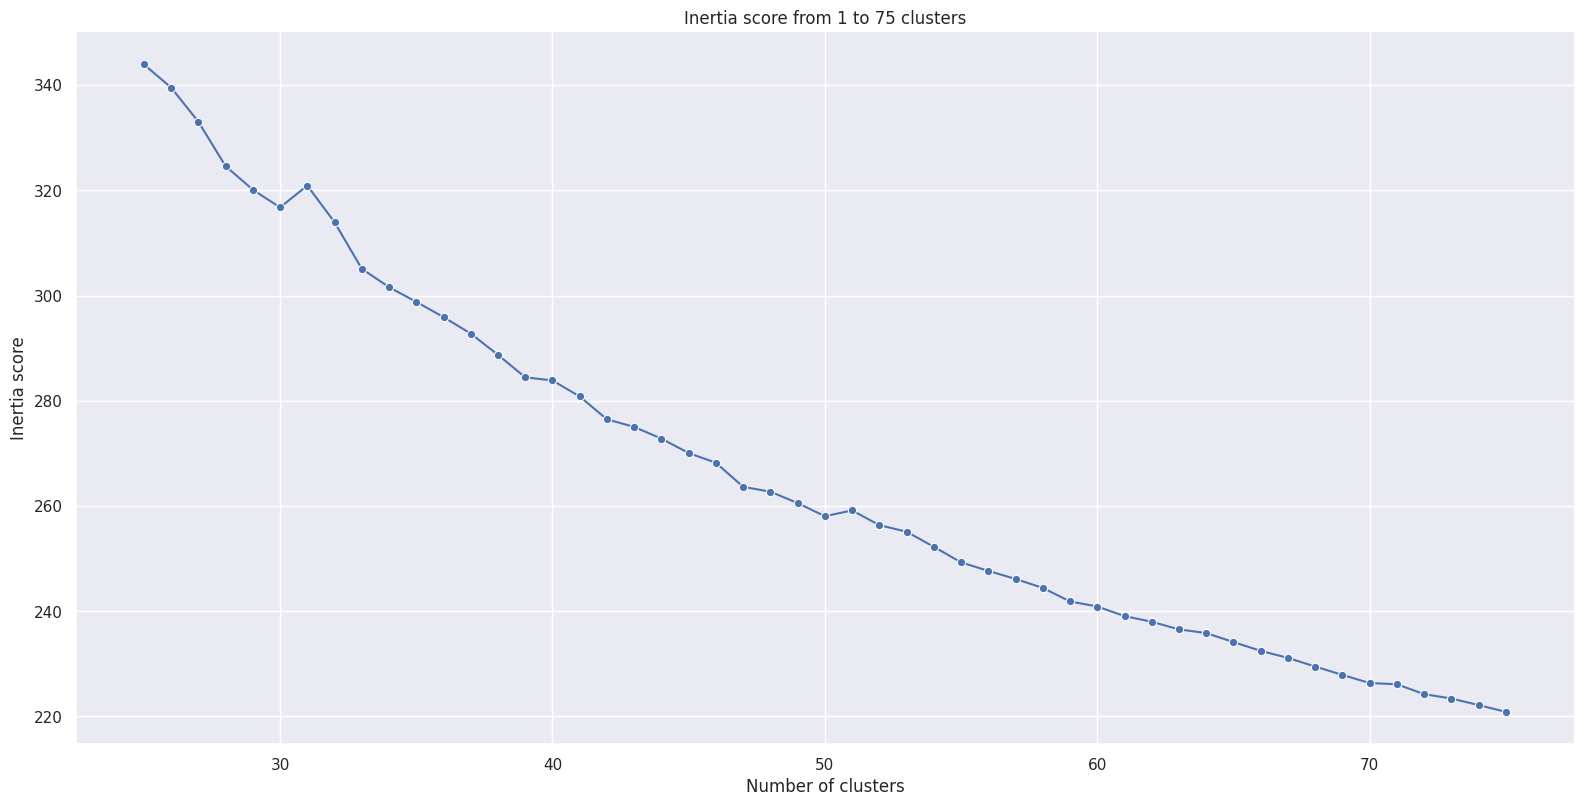

In [40]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(25, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 1 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

# Looking at the clusters for $k=33$


## Create the list for $k=33$

In [41]:
Spotify5000_k33 = Spotilist5000(33)

In [42]:
List_aux2 = Spotify5000_k33.copy()

In [43]:
List_aux2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 5IbxKO5UfeWkkS9EeOLPul  to 4tyl9OMKMG8F2L0RUYQMH3 
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5171 non-null   float64
 1   energy            5171 non-null   float64
 2   loudness          5171 non-null   float64
 3   speechiness       5171 non-null   float64
 4   acousticness      5171 non-null   float64
 5   instrumentalness  5171 non-null   float64
 6   valence           5171 non-null   float64
 7   tempo             5171 non-null   float64
 8   play_list         5171 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 383.8+ KB


In [44]:
Spotify5000i_links.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5171 entries, 1n7JnwviZ7zf0LR1tcGFq7  to 7E1ErYYCn0lYjHODZ1qGuB 
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5171 non-null   object
 1   html    5171 non-null   object
dtypes: object(2)
memory usage: 121.2+ KB


In [45]:
PlayList_k33_m = pd.merge(List_aux2, Spotify5000i_links, left_index=True, right_index=True)

In [46]:
PlayList_k33_m

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,play_list,name,html
id,,,,,,,,,,,
5IbxKO5UfeWkkS9EeOLPul,0.731127,0.637,0.885984,0.488017,0.129518,0.000000,0.705584,0.841965,0,Movimiento De Caderas,https://open.spotify.com/track/5IbxKO5UfeWkkS9...
3lPAHV0b53zgRRm9LBgnTY,0.506722,0.961,0.952121,0.433551,0.026406,0.000000,0.807107,0.811229,0,Empire State Of Mind,https://open.spotify.com/track/3lPAHV0b53zgRRm...
3FmAUR4SPWa3P1KyDf21Fu,0.639090,0.748,0.832953,0.393246,0.038554,0.000004,0.672081,0.626202,0,Roxanne - Remastered 2003,https://open.spotify.com/track/3FmAUR4SPWa3P1K...
3Ga6eKrUFf12ouh9Yw3v2D,0.801448,0.679,0.896857,0.147059,0.180723,0.000074,0.628426,0.775775,0,Downtown,https://open.spotify.com/track/3Ga6eKrUFf12ouh...
22UDw8rSfLbUsaAGTXQ4Z8,0.751810,0.729,0.929380,0.355120,0.171687,0.000000,0.519797,0.551110,0,American Boy,https://open.spotify.com/track/22UDw8rSfLbUsaA...
...,...,...,...,...,...,...,...,...,...,...,...
3gcA0BXLBKnO40ZXDK9VoK,0.457084,0.560,0.843941,0.151416,0.471888,0.000016,0.631472,0.839492,32,Xico,https://open.spotify.com/track/3gcA0BXLBKnO40Z...
3Dy4REq8O09IlgiwuHQ3sk,0.460186,0.949,0.901796,0.051307,0.396586,0.000008,0.662944,0.689771,32,Waterloo,https://open.spotify.com/track/3Dy4REq8O09Ilgi...
3oEkrIfXfSh9zGnE7eBzSV,0.469493,0.788,0.868116,0.040414,0.576305,0.000778,0.527919,0.589514,32,The Winner Takes It All,https://open.spotify.com/track/3oEkrIfXfSh9zGn...


In [47]:
PlayList_k33_vf = PlayList_k33_m.loc[:,['name','play_list', 'html']]

Check how long the list are.

In [48]:
PlayList_k33_vf['play_list'].value_counts()

,count
play_list,
1,283
25,275
7,273
4,248
10,212
11,205
13,198
23,194
3,180


In [ ]:
from google.colab import files

PlayList_k33_vf.to_csv('PlayList_k33_vf.csv', index=True)  # This contains tha clean table with the lists of 33 clusters
files.download('PlayList_k33_vf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The graphics

Here, we compute the average of the values in the columns in each list, so we have grouped by play_list.

In [49]:
Spotify5000_k33.groupby(by='play_list').mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
play_list,,,,,,,,
0,0.643596,0.760357,0.888186,0.373747,0.107374,0.000850,0.651414,0.735230
1,0.244150,0.926830,0.844392,0.132673,0.012061,0.864619,0.135373,0.485758
2,0.683967,0.467194,0.825490,0.078948,0.443503,0.019472,0.491452,0.501800
3,0.457342,0.108922,0.623467,0.053663,0.965914,0.894506,0.197515,0.456889
4,0.735960,0.832367,0.884399,0.069340,0.090649,0.010360,0.889156,0.588985
5,0.367770,0.878908,0.873226,0.092216,0.016681,0.055571,0.441400,0.556555
6,0.288831,0.136533,0.672251,0.046678,0.925162,0.069651,0.138091,0.484681
7,0.634666,0.815971,0.896385,0.072368,0.071103,0.014020,0.415716,0.572071
8,0.791086,0.767705,0.880945,0.115409,0.403109,0.008213,0.827513,0.479490


In [50]:
Spotify5000_k33.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'tempo', 'play_list'],
      dtype='object')

##Trying the Radar diagram

In [51]:
import plotly.graph_objects as go

In [52]:
Spotify5000_k33.head(2)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,play_list
id,,,,,,,,,
5IbxKO5UfeWkkS9EeOLPul,0.731127,0.637,0.885984,0.488017,0.129518,0.0,0.705584,0.841965,0
3lPAHV0b53zgRRm9LBgnTY,0.506722,0.961,0.952121,0.433551,0.026406,0.0,0.807107,0.811229,0


In [53]:
# Code given by the school
# Create an empty list to store the Scatterpolar object of each cluster
scatter_objects = []

df_aux = Spotify5000_k33.drop('play_list', axis=1).copy()
# State the label for each arm of the chart
categories = df_aux.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(Spotify5000_k33['play_list'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = []
  for l in range(0,8): # we want to leave out the column "play_list"
    mean_aux = Spotify5000_k33.loc[Spotify5000_k33["play_list"] == cluster, Spotify5000_k33.columns[l]].mean()
    cluster_means.append(mean_aux)


  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'List {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean features by cluster',
  height = 620,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

Now, I want to try Tsiry's code for the same plot

In [54]:
k = 33
seed = 27
model = KMeans(n_clusters = k, random_state = seed)
model.fit(Spotify5000)
print(f'N_iter = {model.n_iter_}, Max_iter = {model.max_iter}')

N_iter = 32, Max_iter = 300


In [55]:
model.__dict__

{'n_clusters': 33,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 'auto',
 'verbose': 0,
 'random_state': 27,
 'copy_x': True,
 'algorithm': 'lloyd',
 'feature_names_in_': array(['danceability', 'energy', 'loudness', 'speechiness',
        'acousticness', 'instrumentalness', 'valence', 'tempo'],
       dtype=object),
 'n_features_in_': 8,
 '_tol': np.float64(6.494010397852869e-06),
 '_n_init': 1,
 '_algorithm': 'lloyd',
 '_n_threads': 1,
 'cluster_centers_': array([[6.43595804e-01, 7.60357143e-01, 8.88185676e-01, 3.73747277e-01,
         1.07374283e-01, 8.49999855e-04, 6.51414068e-01, 7.35229817e-01],
        [2.44150244e-01, 9.26830389e-01, 8.44391745e-01, 1.32672810e-01,
         1.20609111e-02, 8.64619469e-01, 1.35373357e-01, 4.85758292e-01],
        [6.83966880e-01, 4.67193960e-01, 8.25490117e-01, 7.89475223e-02,
         4.43502871e-01, 1.94723908e-02, 4.91452322e-01, 5.01799526e-01],
        [4.57342296e-01, 1.08921539e-01, 6.23467064e-01, 5.36631566e-02,
    

/tmp/ipython-input-1786654239.py:18: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



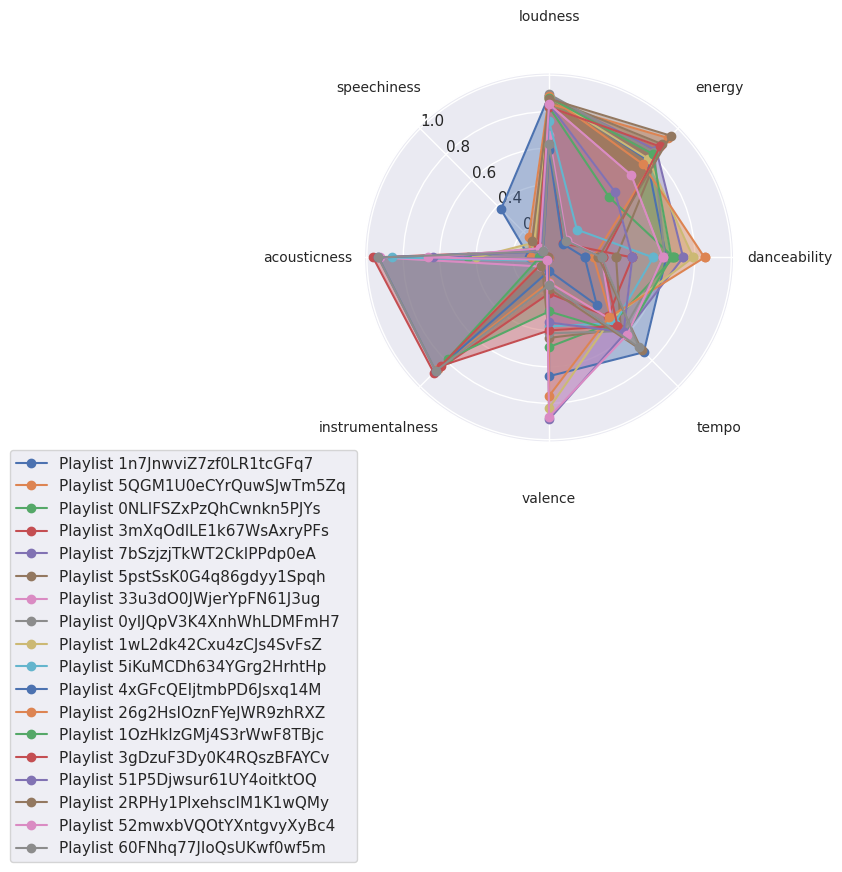

In [56]:
from numpy import pi

# Names of features
categories = model.feature_names_in_
# Coordinates of cluster centers. The algorithm converges, it is fine!
cluster_centers = model.cluster_centers_

N = len(categories)
# Angle that each categories does on the polar coordinate
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Axis settings
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(0) # Set the offset for the location of 0 in radians
ax.set_theta_direction(1) # Set the direction in which theta increases. 1 for counterclockwise
ax.set_rlabel_position(-225) # Update the theta position of the radius labels (The angular position of the radius labels in degrees)
ax.set_xticklabels(categories, fontsize = 10, ha = 'center', va = 'center', y = -.18)

for i in range(18):

    values=cluster_centers[i].flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, '-o', label= f'Playlist {Spotify5000.index[i]}')
    ax.fill(angles, values, alpha = 0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0., 0.))
plt.show()

Now, exploring the idea of using the variances to plot

In [57]:
total_variance_per_cluster = (
    Spotify5000_k33.groupby("play_list").var().sum(axis=1)
)

/tmp/ipython-input-2411714865.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




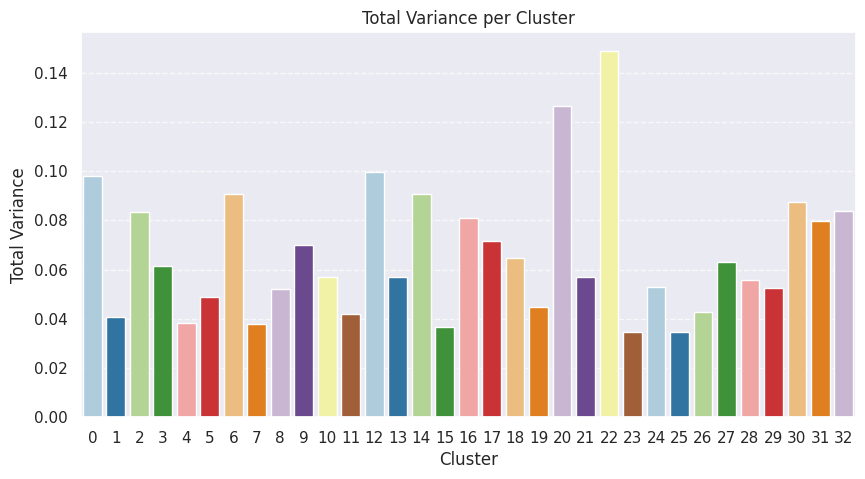

In [58]:
import seaborn as sns

# Convert to DataFrame for Seaborn
variance_df = total_variance_per_cluster.reset_index()
variance_df.columns = ["Cluster", "Total Variance"]

# Create barplot
plt.figure(figsize=(10, 5))
sns.barplot(x="Cluster", y="Total Variance", data=variance_df, palette="Paired")

# Labels and title
plt.xlabel("Cluster")
plt.ylabel("Total Variance")
plt.title("Total Variance per Cluster")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

I want to detect the three features with biggest variance and plot them in 3d

In [59]:
column_variances = Spotify5000_k33.drop(columns=["play_list"]).var()

In [60]:
column_variances.sort_values(ascending=False)

,0
instrumentalness,0.142519
acousticness,0.128375
energy,0.083789
valence,0.079614
danceability,0.050870
tempo,0.017847
loudness,0.010601
speechiness,0.006005


In [61]:
column_means = Spotify5000_k33.drop(columns=["play_list"]).mean()

In [62]:
column_means.sort_values(ascending=False)

,0
loudness,0.825270
energy,0.653282
tempo,0.554545
danceability,0.524926
valence,0.448983
acousticness,0.292444
instrumentalness,0.264291
speechiness,0.090593


In [63]:
top_3_columns = column_means.nlargest(3).index.tolist()

In [64]:
top_3_columns

['loudness', 'energy', 'tempo']

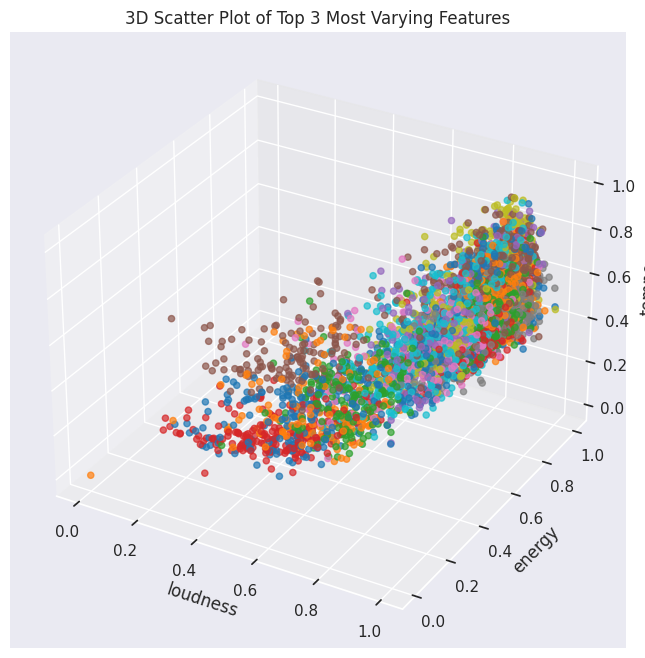

In [65]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the three most varying features and the cluster labels

df_selected = Spotify5000_k33[top_3_columns]
labels = Spotify5000_k33["play_list"]

# Create a 3D figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    df_selected.iloc[:, 0],  # X-axis
    df_selected.iloc[:, 1],  # Y-axis
    df_selected.iloc[:, 2],  # Z-axis
    c=labels,  # Color by cluster
    cmap="tab10",  # Colormap for different clusters
    alpha=0.7  # Transparency for better visibility
)

# Labels
ax.set_xlabel(top_3_columns[0])
ax.set_ylabel(top_3_columns[1])
ax.set_zlabel(top_3_columns[2])
ax.set_title("3D Scatter Plot of Top 3 Most Varying Features")

# Show the plot
plt.show()

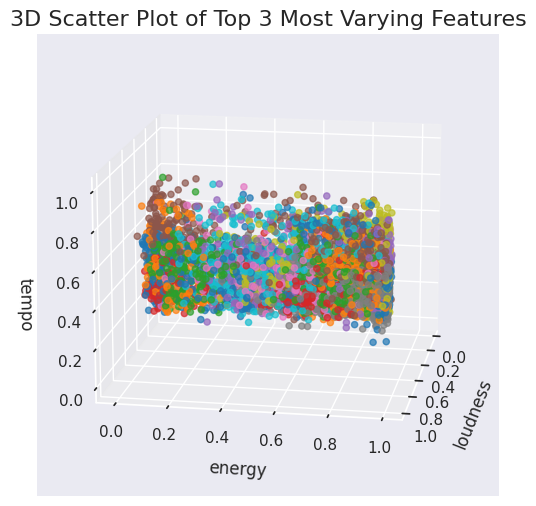

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
sc = ax.scatter(
    df_selected.iloc[:, 0],
    df_selected.iloc[:, 1],
    df_selected.iloc[:, 2],
    c=labels,
    cmap="tab10",
    alpha=0.7
)

# Labels with better visibility
ax.set_xlabel(top_3_columns[0], fontsize=12, labelpad=10)
ax.set_ylabel(top_3_columns[1], fontsize=12, labelpad=10)
ax.set_zlabel(top_3_columns[2], fontsize=12, labelpad=10)  # Make Z-label clearer

# Adjust the viewing angle
ax.view_init(elev=15, azim=10)

# Title
ax.set_title("3D Scatter Plot of Top 3 Most Varying Features", fontsize=16)

# Show the plot
plt.show()

The same plot but interactive


In [67]:
!pip install plotly

In [69]:
import plotly.express as px
import pandas as pd

# Compute variance for all numerical columns (excluding "play_list")
column_variances = Spotify5000_k33.drop(columns=["play_list"]).var()

# Select the top 3 columns with the highest variance
top_3_columns = column_variances.nlargest(3).index.tolist()

# Extract the selected columns and labels
df_selected = Spotify5000_k33[top_3_columns].copy()
df_selected["play_list"] = Spotify5000_k33["play_list"]  # Add labels

# Create 3D scatter plot

fig = px.scatter_3d(
    df_selected,
    x=top_3_columns[0],
    y=top_3_columns[1],
    z=top_3_columns[2],
    color="play_list",  # Color points by cluster
    size_max=1,  # Max size of points
    size=None,  # If you want dynamic size, change to a numeric column
    opacity=0.8,  # Adjust transparency
    color_discrete_sequence=px.colors.qualitative.Bold  # Change color scheme
)


#fig = px.scatter_3d(
 #   df_selected,
 #   x=top_3_columns[0],
 #   y=top_3_columns[1],
 #   z=top_3_columns[2],
 #   color="play_list",  # Color points based on cluster
 #   title="Interactive 3D Scatter Plot of Top 3 Most Varying Features",
 #   opacity=0.7
#)

# Show the plot
fig.show()

In [70]:
import plotly.express as px

# Compute variance for all numerical columns (excluding "play_list")
column_variances = Spotify5000_k33.drop(columns=["play_list"]).var()

# Select the top 3 columns with the highest variance
top_3_columns = column_variances.nlargest(3).index.tolist()

# Extract the selected columns and labels
df_selected = Spotify5000_k33[top_3_columns].copy()
df_selected["play_list"] = Spotify5000_k33["play_list"]  # Add labels

# Create 3D scatter plot with PRISM colors & SMALL points
fig = px.scatter_3d(
    df_selected,
    x=top_3_columns[0],
    y=top_3_columns[1],
    z=top_3_columns[2],
    color="play_list",  # Color points by cluster
    opacity=0.8,  # Adjust transparency
    color_discrete_sequence=px.colors.qualitative.Dark2,  # Use PRISM color scheme
    size_max=7,  # Reduce max point size
    size=[3] * len(df_selected)  # Force all points to be tiny
)

# Show the plot
fig.show()

In [71]:
import plotly.express as px

# Compute variance for all numerical columns (excluding "play_list")
column_variances = Spotify5000_k33.drop(columns=["play_list"]).var()

# Select the top 3 columns with the highest variance
top_3_columns = column_variances.nlargest(3).index.tolist()

# Extract the selected columns and labels
df_selected = Spotify5000_k33[top_3_columns].copy()
df_selected["play_list"] = Spotify5000_k33["play_list"]  # Add labels

# Create 3D scatter plot with PRISM colors & SMALL points
fig = px.scatter_3d(
    df_selected,
    x=top_3_columns[0],
    y=top_3_columns[1],
    z=top_3_columns[2],
    color="play_list",  # Color points by cluster
    opacity=0.8,  # Adjust transparency
    color_discrete_sequence=px.colors.qualitative.Bold,  # Use PRISM color scheme
    size_max=5,  # Reduce max point size
    size=[2] * len(df_selected)  # Force all points to be tiny
)

# Show the plot
fig.show()

In [72]:
import plotly.express as px

# Compute variance for all numerical columns (excluding "play_list")
column_variances = Spotify5000_k33.drop(columns=["play_list"]).var()

# Select the 3 columns with the SMALLEST variance
bottom_3_columns = column_variances.nsmallest(3).index.tolist()

# Extract the selected columns and labels
df_selected = Spotify5000_k33[bottom_3_columns].copy()
df_selected["play_list"] = Spotify5000_k33["play_list"]  # Add labels

# Create 3D scatter plot with PRISM colors & SMALL points
fig = px.scatter_3d(
    df_selected,
    x=bottom_3_columns[0],
    y=bottom_3_columns[1],
    z=bottom_3_columns[2],
    color="play_list",  # Color points by cluster
    opacity=0.8,  # Adjust transparency
    color_discrete_sequence=px.colors.qualitative.Set1,  # Use PRISM color scheme
    size_max=5,  # Reduce max point size
    size=[2] * len(df_selected)  # Force all points to be tiny
)

# Show the plot
fig.show()

In [ ]:
#from google.colab import files

#Spotify10.to_csv('Spotify10_list.csv', index=True)  # This contains tha clean table orderlines and products together with the discount and discount percentage
#files.download('Spotify10_list.csv')

I want a different criteria to plot. I will use, between clusters variance.

Selected features for 3D projection: ['instrumentalness', 'acousticness', 'energy']


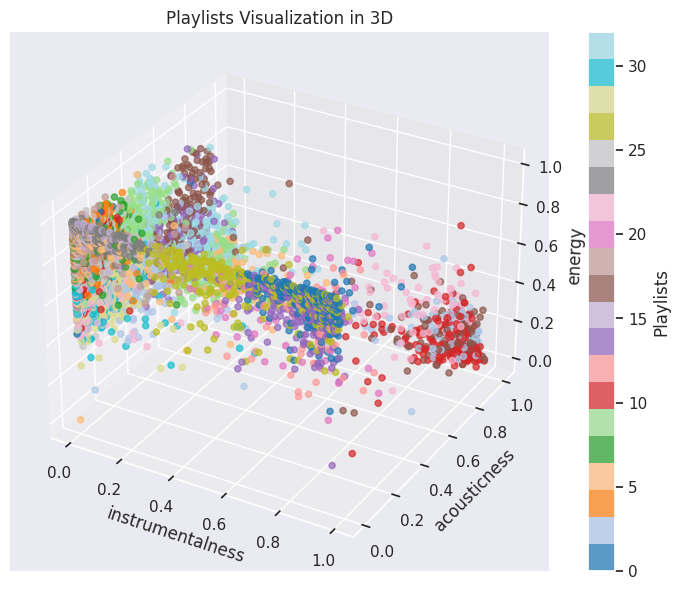

In [73]:
import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.cluster import KMeans

# Compute overall mean for each feature
global_means = Spotify5000_k33.drop(columns=['play_list']).mean()

# Compute cluster means for each feature
cluster_means = Spotify5000_k33.groupby('play_list').mean()

# Compute between-cluster variance
between_cluster_variance = cluster_means.apply(lambda col: np.sum(Spotify5000_k33['play_list'].value_counts() * (col - global_means[col.name])**2))

# Select top 3 features with highest between-cluster variance
top_3_features = between_cluster_variance.nlargest(3).index.tolist()
print("Selected features for 3D projection:", top_3_features)

# Plot the selected features in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Spotify5000_k33[top_3_features[0]], Spotify5000_k33[top_3_features[1]], Spotify5000_k33[top_3_features[2]], c=Spotify5000_k33['play_list'], cmap='tab20', alpha=0.7)
ax.set_xlabel(top_3_features[0])
ax.set_ylabel(top_3_features[1])
ax.set_zlabel(top_3_features[2])
plt.title("Playlists Visualization in 3D")
plt.colorbar(scatter, label='Playlists')
plt.show()
